In [2]:
#ML Lab 2
#Decision Tree

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


dataset = pd.read_csv("Social_Network_Ads.csv")

from sklearn.model_selection import train_test_split
X = dataset.iloc[:,[2,3]]
y =dataset.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)


In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


C:\Users\udayh\.conda\envs\tensorflow_env\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\udayh\.conda\envs\tensorflow_env\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\udayh\.conda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [4]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state= 0)
classifier.fit(X_train, y_train)



DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [5]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [6]:
y_test

132    0
309    0
341    0
196    0
246    0
60     0
155    0
261    1
141    0
214    0
37     0
134    0
113    0
348    0
12     0
59     0
293    0
140    0
206    1
199    0
176    0
268    1
124    0
344    1
175    0
313    1
78     0
15     0
286    0
102    0
      ..
7      1
260    0
68     0
20     1
107    0
14     0
363    0
304    0
361    1
329    1
336    1
64     0
55     0
106    0
300    1
229    1
122    0
373    1
395    1
325    0
380    0
253    1
56     0
8      0
190    0
146    1
135    0
390    1
264    1
364    1
Name: Purchased, Length: 100, dtype: int64

In [5]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[62,  6],
       [ 3, 29]], dtype=int64)

In [6]:
from matplotlib.colors import ListedColormap
X_set,y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start= X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step= 0.01),
                     np.arange(start = X_set[:,1].min()-1,stop = X_set[:,1].max()+1,step = 0.01))


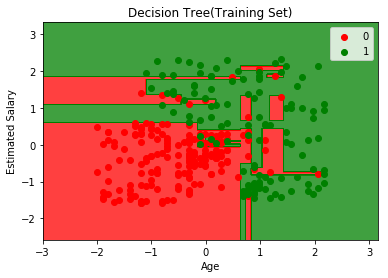

In [7]:
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75,cmap = ListedColormap(('red','green')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())


for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1], c= ListedColormap(('red','green'))(i),label = j)


plt.title("Decision Tree(Training Set)")
plt.xlabel('Age')

plt.ylabel('Estimated Salary')

plt.legend()
plt.show()

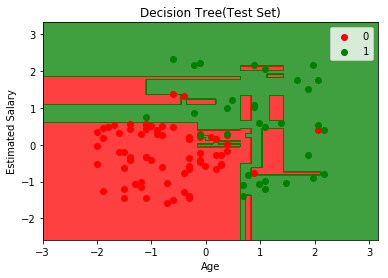

In [8]:
from matplotlib.colors import ListedColormap
X_set,y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start= X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step= 0.01),
                     np.arange(start = X_set[:,1].min()-1,stop = X_set[:,1].max()+1,step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75,cmap = ListedColormap(('red','green')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())


for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1], c= ListedColormap(('red','green'))(i),label = j)


plt.title("Decision Tree(Test Set)")
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

plt.legend()
plt.show()